In [1]:
%load_ext autoreload
%autoreload 2

In [490]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp
from toolz.curried import *
import itertools

import gc_model as gc
import hic_analysis as hic
import visualize

In [399]:
@curry
@excepts(FileNotFoundError)
def fit_dir(d, n):
    return np.load(f'{d}/{n}.npz')

chr19_eye = fit_dir('rao2014/chr19-eye')
chr20_eye = fit_dir('rao2014/chr20-eye')
chr19_20kb = fit_dir('chr19-eye-20kb/')

In [4]:
@curry
def unpack_args(f, args_list):
    return f(*args_list)

unzip = lambda zipped: zip(*zipped)

In [265]:
input_data_chr19 = np.load('rao2014/Rao2014-chr19.npy')
input_data_chr20 = np.load('rao2014/Rao2014-chr20.npy')
input_data_chr19_20kb = np.load('rao2014/Rao2014-GM12878-chr19-20kb.npy')

In [191]:
%matplotlib qt5
visualize.all_figures(input_data_chr20, chr20_eye(2).values(), chr20_eye(3).values(), histones_dir='histone_modifications/')

/Users/hkariti/repo/technion/Compartments/hic_analysis.py:94: RuntimeWarning: Mean of empty slice
  diag_mean = np.nanmean(diag)


In [28]:
input_subset = input_data_chr20[840:840+300, :][:, 840:840+300]

In [29]:
fit_subset = gc.fit(input_subset, number_of_states=2, weights_shape='eye')

In [108]:
def plot_merged(data, fit):
    generated = gc.generate_interactions_matrix(*fit)
    merged = hic.merge_by_diagonal(hic.normalize_distance(hic.preprocess(data)), hic.normalize_distance(generated))
    plt.imshow(hic.safe_log(merged))
    
generate_normalized = compose(hic.safe_log, hic.normalize_distance, unpack_args(gc.generate_interactions_matrix))

In [12]:
%matplotlib qt5

In [217]:
input_subsets = compose(list, map(lambda d: input_data_chr20[840-d:840+400, 840-d:840+400]))(range(100, 1000, 100))
fit_eye2 = partial(gc.fit, number_of_states=2, weights_shape='eye')
subset_fits = compose(list, map(fit_eye2))(input_subsets)

In [219]:
for input_subset, f in zip(input_subsets, subset_fits):
    d = input_subset.shape[0]
    visualize.hic_figure(input_subset,
                         f[0],
                         f[1], f[2])
    plt.title(f'840+{d}')

In [287]:
d=200
input_subset = input_data_chr20[840:840+d, :][:, 840:840+d]
fit_subset = gc.fit(input_subset, number_of_states=2, weights_shape='eye')

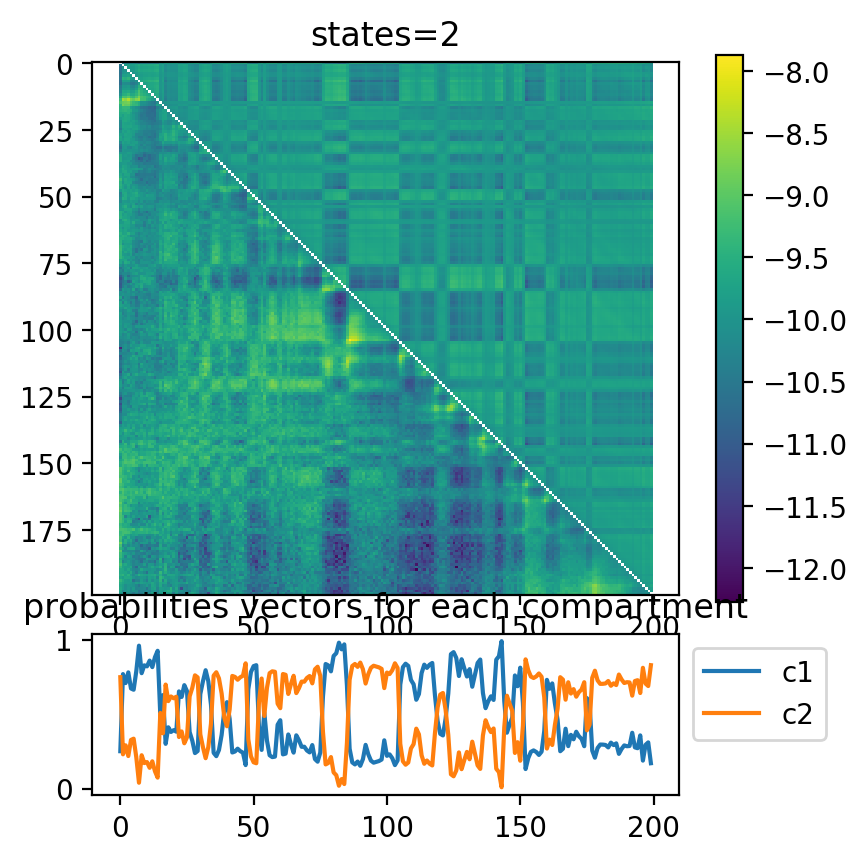

In [288]:
visualize.hic_figure(input_subset, *fit_subset)

In [299]:
fit_all = chr20_eye(2)
list(fit_all.values())[0][840:840+d][:, 0]

array([0.25511068, 0.63797954, 0.71773348, 0.7269926 , 0.72369868,
       0.75601111, 0.82121289, 0.8735932 , 0.79681351, 0.80051632,
       0.80064498, 0.81792342, 0.76854317, 0.77415804, 0.76938861,
       0.54090878, 0.66520937, 0.51439885, 0.53935145, 0.53559747,
       0.61884774, 0.62023731, 0.78594938, 0.78101801, 0.84334094,
       0.80609957, 0.72313793, 0.67526925, 0.54182672, 0.58514906,
       0.81307765, 0.84051003, 0.87634738, 0.85308595, 0.76924139,
       0.52376425, 0.44958323, 0.48698722, 0.62912699, 0.74623664,
       0.74806714, 0.72236709, 0.49162481, 0.44439727, 0.43439752,
       0.40410751, 0.39684933, 0.44764755, 0.82421535, 0.86668811,
       0.88260798, 0.87096226, 0.83742578, 0.80088137, 0.85642402,
       0.80669015, 0.70073705, 0.64573872, 0.72846782, 0.81714624,
       0.83261614, 0.64246416, 0.61999579, 0.6608817 , 0.59969724,
       0.5939835 , 0.67256851, 0.59292794, 0.49343094, 0.45454862,
       0.44517252, 0.44921404, 0.49440104, 0.44236981, 0.45629

In [166]:
ax = plt.figure(3).axes[0].images[-1]

In [223]:
fit_2states_highacc = gc.fit(input_data_chr20, number_of_states=2, weights_shape='eye')
fit_3states_highacc = gc.fit(input_data_chr20, number_of_states=3, weights_shape='eye')

/Users/hkariti/repo/technion/Compartments/hic_analysis.py:94: RuntimeWarning: Mean of empty slice
  diag_mean = np.nanmean(diag)


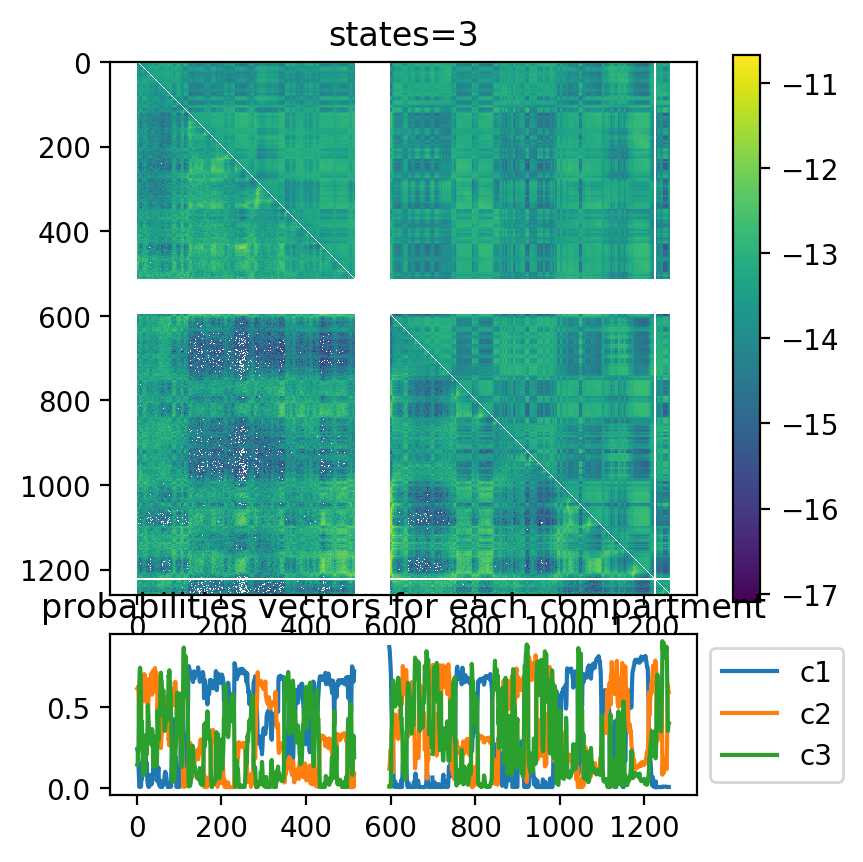

/Users/hkariti/anaconda3/envs/kaplanlab/lib/python3.6/site-packages/matplotlib/ticker.py:632: UserWarning: Warning: converting a masked element to nan.
  return '%-12g' % value


In [244]:
visualize.hic_figure(input_data_chr20, *chr20_eye(2).values())
visualize.hic_figure(input_data_chr20, *chr20_eye(3).values())


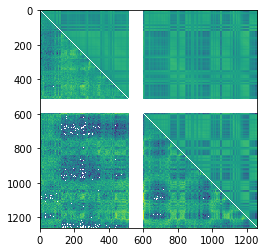

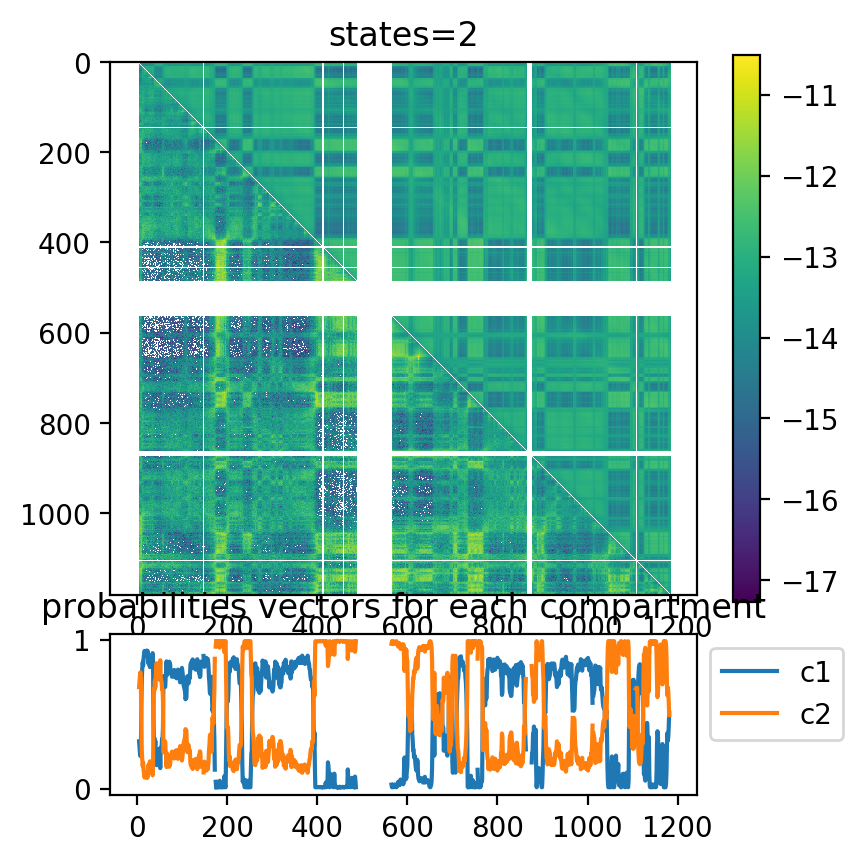

In [248]:
visualize.hic_figure(input_data_chr19, *chr19_eye(2).values())

In [408]:
plt.figure()
m = hic.normalize_distance(input_data_chr19_20kb)
plt.imshow(-hic.safe_log(m))
plt.colorbar()

In [285]:
def index(loci, res=20000):
    return int(loci/res)

In [410]:
plt.figure()
submatrix = m[index(4e6):index(24e6), index(31e6):index(53.3e6)]
plt.imshow(-hic.safe_log(submatrix))
plt.colorbar()

In [322]:
np.log(np.nan)

nan

In [324]:
fit_chr19_20kb_2states = gc.fit(input_data_chr19_20kb, number_of_states=2, weights_shape='eye')

In [325]:
fit_chr19_20kb_3states = gc.fit(input_data_chr19_20kb, number_of_states=3, weights_shape='eye')

In [404]:
g_2states = hic.normalize_distance(gc.generate_interactions_matrix(*chr19_20kb(2).values()))
g_3states = hic.normalize_distance(gc.generate_interactions_matrix(*chr19_20kb(3).values()))

/Users/hkariti/repo/technion/Compartments/hic_analysis.py:94: RuntimeWarning: Mean of empty slice
  diag_mean = np.nanmean(diag)


In [413]:
plt.figure()
submatrix = g_2states[index(4e6):index(24e6), index(31e6):index(53.3e6)]
plt.imshow(-hic.safe_log(submatrix))
plt.colorbar()

In [414]:
plt.figure()
submatrix = g_3states[index(4e6):index(24e6), index(31e6):index(53.3e6)]
plt.imshow(-hic.safe_log(submatrix))
plt.colorbar()

In [353]:
fit_chr19_20kb_2states_submat = gc.fit(input_data_chr19_20kb[400:1100,400:1100], number_of_states=2, weights_shape='eye')
fit_chr19_20kb_3states_submat = gc.fit(input_data_chr19_20kb[400:1100,400:1100], number_of_states=3, weights_shape='eye')
g_2states_submat = hic.normalize_distance(gc.generate_interactions_matrix(*fit_chr19_20kb_2states_submat))
g_3states_submat = hic.normalize_distance(gc.generate_interactions_matrix(*fit_chr19_20kb_3states_submat))

In [354]:
plt.figure()
plt.imshow(-hic.safe_log(g_2states_submat))
plt.colorbar()

In [357]:
index(4e6), index(24e6)
index(31e6), index(53.3e6)

(1550, 2665)

In [359]:
np.random.seed(7)
fit_chr19_20kb_7states = gc.fit(input_data_chr19_20kb, number_of_states=7, weights_shape='eye')

In [368]:
subcompartments_file = open('GSE63525_GM12878_subcompartments.bed')
subcompartments_tab = [ a.split() for a in subcompartments_file ]

In [373]:
chr19_subcompartments_tab = list(filter(lambda x: x[0] == 'chr19', subcompartments_tab))
chr19_subcompartments_tab

[['chr19', '0', '200000', 'NA', '0', '.', '0', '200000', '255,255,255'],
 ['chr19',
  '200000',
  '500000',
  'B1',
  '-1',
  '.',
  '200000',
  '500000',
  '220,20,60'],
 ['chr19',
  '500000',
  '3800000',
  'A1',
  '2',
  '.',
  '500000',
  '3800000',
  '34,139,34'],
 ['chr19',
  '3800000',
  '3900000',
  'B1',
  '-1',
  '.',
  '3800000',
  '3900000',
  '220,20,60'],
 ['chr19',
  '3900000',
  '5000000',
  'A1',
  '2',
  '.',
  '3900000',
  '5000000',
  '34,139,34'],
 ['chr19',
  '5000000',
  '5600000',
  'B1',
  '-1',
  '.',
  '5000000',
  '5600000',
  '220,20,60'],
 ['chr19',
  '5600000',
  '7300000',
  'A1',
  '2',
  '.',
  '5600000',
  '7300000',
  '34,139,34'],
 ['chr19',
  '7300000',
  '7400000',
  'NA',
  '0',
  '.',
  '7300000',
  '7400000',
  '255,255,255'],
 ['chr19',
  '7400000',
  '8100000',
  'A1',
  '2',
  '.',
  '7400000',
  '8100000',
  '34,139,34'],
 ['chr19',
  '8100000',
  '8200000',
  'B1',
  '-1',
  '.',
  '8100000',
  '8200000',
  '220,20,60'],
 ['chr19',
  '8200

In [384]:
def parse_subcompartment(l, res=20000):
    start = int(l[1])
    end = int(l[2])
    subcompartment = l[3]
    if subcompartment == 'NA':
        return None
    return dict(start=index(start), end=index(end), subcompartment=subcompartment)

subcompartment_index = {
    'A1': 0,
    'A2': 1,
    'B1': 2,
    'B2': 3,
    'B3': 4,
    'B4': 5
}

In [483]:
chr19_subcompartments = np.zeros((6, input_data_chr19_20kb.shape[0]))

for s in filter(None, map(parse_subcompartment, chr19_subcompartments_tab)):
    start, end, subc = s['start'], s['end'], subcompartment_index[s['subcompartment']]
    if subc == 4:
        print(start, end)
    chr19_subcompartments[subc, start:end] = 1

In [403]:
ax = plt.subplot(4, 1, 1)
ax.plot(chr19_subcompartments[:2, :].sum(axis=0))
ax = plt.subplot(4,1,2)
ax.plot(chr19_subcompartments[2:, :].sum(axis=0))
ax = plt.subplot(4,1,3)
ax.plot(chr19_20kb(2)['lambdas'])
ax = plt.subplot(4,1,4)
ax.plot(chr19_20kb(3)['lambdas'])

In [499]:
@curry
def corr_match(sources, dest):
    correlations = [ stats.pearsonr(s, dest)[0] for s in sources ]
    match_idx = np.nanargmax(correlations)
    print(correlations)
    
    return match_idx

match_subc = corr_match(chr19_subcompartments)

In [502]:
[ match_subc(np.nan_to_num(chr19_20kb(3)['lambdas'][:, i])) for i in range(3) ]

[0.6941558362749225, nan, -0.08707469033376009, -0.42058884910864086, nan, -0.15866823981211628]
[-0.587880776008616, nan, -0.12828250323107995, 0.579429168606351, nan, 0.5095941476413746]
[0.30626534042922204, nan, 0.36457666565103314, -0.2160756241906976, nan, -0.34363140106224566]


[0, 3, 2]

In [506]:
def plot_subc_states(subc, lambdas):
    matches = [ corr_match(np.nan_to_num(lambdas.T), sc) for sc in subc ]
    
    plt.figure()
    fig_count = max(len(subc), lambdas.shape[1])
    for i, m in enumerate(matches):
        
ax = plt.subplot(4, 1, 1)
ax.set_title('SC: A1, state: 0')
ax.plot(chr19_subcompartments[0, :])
ax.plot(chr19_20kb(3)['lambdas'][:, 0])
ax = plt.subplot(4,1,2)
ax.set_title('SC: B1, state: 2')
ax.plot(chr19_subcompartments[2, :])
ax.plot(chr19_20kb(3)['lambdas'][:, 2])
ax = plt.subplot(4,1,3)
ax.set_title('SC: B2, state: 1')
ax.plot(chr19_subcompartments[3, :])
ax.plot(chr19_20kb(3)['lambdas'][:, 1])
ax = plt.subplot(4,1,4)
ax.set_title('SC: B4')
ax.plot(chr19_subcompartments[5, :])
plt.tight_layout()

In [462]:
np.savez('chr19-eye-20kb/7.npz', lambdas=fit_chr19_20kb_7states[0], weights=fit_chr19_20kb_7states[1], alpha=fit_chr19_20kb_7states[2])

In [488]:
len(chr19_subcompartments_tab)

116